In [1]:
source("Main.R")
source("Conf.R")
source("Utilities.R")
source("DAVID_query.R")
library("factoextra")
library("maptree")
library(repr)


corrplot 0.84 loaded


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘pls’


The following object is masked from ‘package:corrplot’:

    corrplot


The following object is masked from ‘package:stats’:

    loadings


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following o

In [2]:
#preds <- read.csv("/home/beraslan/jovian-work/analysisSingle/LM_CombKO_ModuleExpPred_JustNGenes.csv", row.names = 1)
#preds <- read.csv("/home/beraslan/jovian-work/analysisSingle/LM_CombKO_ModuleExpPred_JustClusters.csv", row.names = 1)
preds <- read.csv("/home/beraslan/jovian-work/analysisSingle/LM_CombKO_ModuleExpPredNoInteraction.csv", row.names = 1)

#preds <- read.csv("/home/beraslan/jovian-work/analysisSingle/LM_CombKO_ModuleExpPred.csv", row.names = 1)

In [3]:
head(preds)

,PredGeneModLog_1,PredGeneModLog_2,PredGeneModLog_3,PredGeneModLog_4,PredGeneModLog_5,PredGeneModLog_6,PredGeneModLog_7,PredGeneModLog_8,PredGeneModLog_9,PredGeneModLog_10,⋯,GeneModLog_73,GeneModLog_74,GeneModLog_75,GeneModLog_76,GeneModLog_77,GeneModLog_78,GeneModLog_79,GeneModLog_80,GeneModLog_81,GeneModLog_82
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CATCCCACACTTTAGG-1-E3-3-0,-0.064616492,-0.17865771,0.03905088,-0.01482896,0.12770787,-0.110492946,-0.187435110,0.139345531,0.003935959,0.01372183,⋯,0.4139085,-0.04674519,0.54314220,-0.50217706,0.1894783,0.1530602,0.31359756,-0.04233313,0.08380486,-0.1081037
ATGAAAGCAGCGTAGA-1-E4-10-0,0.235713958,0.03971024,0.02228012,0.17051946,0.01638879,0.278869143,0.184069290,-0.006290258,0.007626181,0.09946215,⋯,0.2098922,-0.29098470,-0.06552426,0.01036286,0.1211581,0.7875437,0.43393773,0.01759209,-0.11929956,-0.2159503
TCACAAGGTTTGGGAG-1-E4-17-0,0.006975193,-0.11479327,0.06928361,0.03952001,0.16458945,0.003712172,-0.107741869,0.131139480,0.024520460,0.03538678,⋯,-0.4340165,-0.24766241,-0.23746018,-0.08674074,0.2156836,0.9428492,-0.06988606,-0.10267517,-0.21306382,0.6844706
TCGGGACCACCAACAT-1-E4-8-0,0.062511337,-0.01680957,0.06015278,0.07014502,0.14413621,0.094792496,0.009761538,0.090379559,0.008256582,0.03276362,⋯,0.1085915,0.06619645,0.13820152,-0.11474461,-0.3114283,-0.3264266,0.32902202,0.98928990,0.49072750,0.2260870
TTTCGATCATGCCATA-1-E4-16-0,0.148411789,0.23497294,0.07117080,0.21447158,0.01498990,0.215660883,0.218630680,-0.028047672,0.192044563,0.01272191,⋯,0.1545975,-0.40344885,-0.10437874,0.45901990,-0.3882525,-0.1321074,0.36424148,0.24790734,0.10186548,0.5459119
GTGTAACTCGGAGCAA-1-E3-15-0,-0.125874746,-0.01875775,-0.08826180,-0.03823148,-0.12326690,-0.122457375,-0.103333116,-0.187386277,0.099667676,-0.11433178,⋯,-0.4804642,-0.37213245,-0.39413196,-0.29175106,-0.7434440,-1.1102786,-0.60590500,-0.11240786,-0.38386163,0.7846945


In [4]:
unique(preds$guide_group)

[1] G1   G3        G6   G5   G4   G2   G7   G3G6 G1G4 G1G7 G4G7 G3G4 G1G5 G3G5
[16] G2G4 G2G6 G2G5 G1G6 G1G3 G3G7 G2G3 G1G2 G5G7 G4G6 G6G7 G4G5 G2G7 G5G6
29 Levels:  G1 G1G2 G1G3 G1G4 G1G5 G1G6 G1G7 G2 G2G3 G2G4 G2G5 G2G6 G2G7 ... G7

In [5]:
expVars = list()

for(i in c("G1", "G2", "G3", "G4", "G5", "G6", "G7")){
    for(j in c("G1", "G2", "G3", "G4", "G5", "G6", "G7")){
        
        predsTemp = NA
        
        if(i == j){
            predsTemp = preds[preds$guide_group== i,]
        }else if(paste0(i,j) %in% unique(preds$guide_group)){
            predsTemp = preds[preds$guide_group== paste0(i,j),]
            #plot(predsTemp[,paste0("Pred",1)], predsTemp[,paste0("GeneMod_",1)])
            #abline(0,1)
        }
            
        if(!is.na(predsTemp)) {
            
          print(dim(predsTemp))
          
            
          predY = predsTemp[,paste0("PredGeneModLog_",1:82)]
          #predY = predsTemp[,paste0("Pred",1:82)]
          realY = predsTemp[,paste0("GeneModLog_",1:82)]
            
          medianPred = sapply(predY, function(x)mean(x, na.rm=TRUE))
          medianReal = sapply(realY, function(x)mean(x, na.rm=TRUE))
            
          myR2 <- computeR2(response=medianReal, prediction=medianPred)
            
          #heatscatter(medianPred,medianReal, cor=TRUE, main = paste0(paste0(i,j), " R^2 = ",myR2))  
          
          
          
          expVars <- lappend(expVars, c(i, j, myR2))

   
        }   
       
    }
}

Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1] 3857  165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1] 175 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1] 213 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1] 134 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1]  89 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1]  47 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1]  81 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1] 3651  165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1] 255 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1] 124 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1]  97 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1]  73 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1]  84 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1] 4736  165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1] 183 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1] 131 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1]  71 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1] 133 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1] 2860  165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1]  72 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1]  34 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1]  73 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1] 2140  165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1]  30 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1]  62 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1] 1122  165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1]  20 165


Warning message in if (!is.na(predsTemp)) {:
“the condition has length > 1 and only the first element will be used”


[1] 1848  165


In [6]:
expVars <- data.frame(do.call(rbind, expVars), stringsAsFactors = FALSE)


In [7]:
expVars$X4 <- sapply(expVars$X3 , function(x){round(as.numeric(x), digits = 2)})

In [8]:
head(expVars)
expVars$Grp = "GRP"
expVars[expVars$X4 < 0, "X4"] = 0

,X1,X2,X3,X4
,<chr>,<chr>,<chr>,<dbl>
1,G1,G1,0.956577844682847,0.96
2,G1,G2,-0.0756164222294844,-0.08
3,G1,G3,0.806072402205809,0.81
4,G1,G4,0.536309306757259,0.54
5,G1,G5,0.702783964416327,0.70
6,G1,G6,0.21433910480562,0.21


In [9]:
expVars$X1 <- factor(expVars$X1, levels = c("G1", "G2", "G3", "G4", "G5", "G6", "G7"))
expVars$X2 <- factor(expVars$X2, levels = c("G1", "G2", "G3", "G4", "G5", "G6", "G7"))

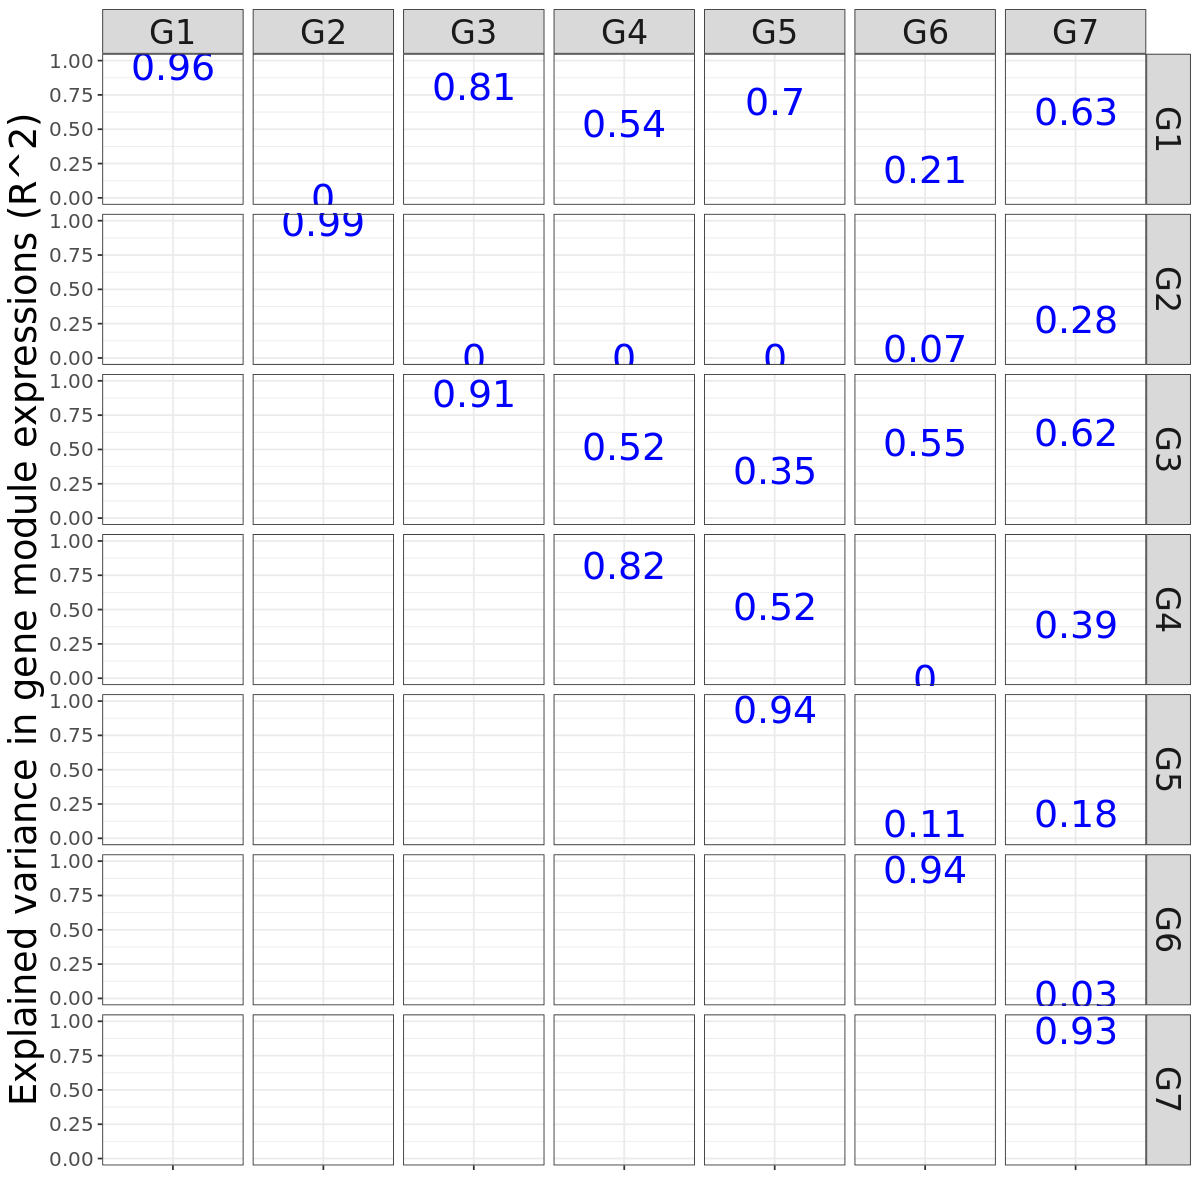

In [10]:
options(repr.plot.width=10, repr.plot.height=10)

ggplot(expVars, aes(x=Grp,y=X4)) +
      #geom_violin()+
      #geom_boxplot()+
      #geom_point(size=0.1, alpha=0.3)+geom_jitter(alpha=0.3)+
      #geom_density(alpha=0.6)+
      facet_grid(X1 ~ X2) +
      stat_summary(aes(label=round(..y..,2)), fun="median", geom="text", size=8, color="blue")+
      labs(x="", y = "Explained variance in gene module expressions (R^2)")+
      theme_bw()+theme(strip.text=element_text(size=20), axis.text.x = element_blank(), axis.text.y=element_text(size=12), axis.title.y=element_text(size=22))+ylim(0,1)